In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
background_data = pd.read_excel('./excel/MAP.xlsx', sheet_name="background")
background_data.head()

,place,precision,recall,mAP50,mAP50-95,fitness
0,dessert,0.780408,0.566038,0.607454,0.331738,0.359310
1,snow,0.759523,0.566038,0.563508,0.305758,0.331533
2,rural,0.700000,0.670000,0.650000,0.420000,0.440000


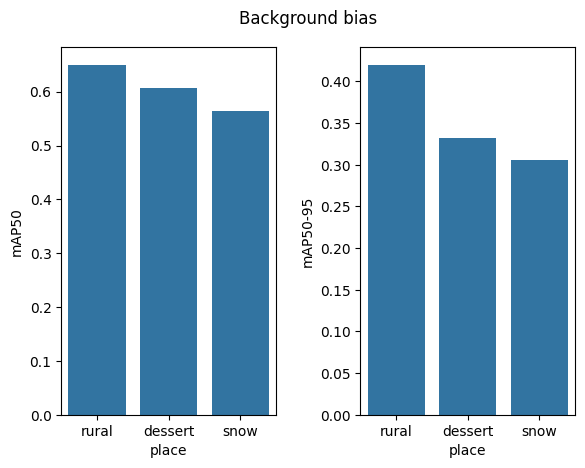

In [5]:
fig, axs = plt.subplots(ncols=2)
fig.tight_layout(pad=3.0)
sns.barplot(x=background_data["place"], y=background_data["mAP50"], order=["rural","dessert", "snow"], ax=axs[0])
sns.barplot(x=background_data["place"], y=background_data["mAP50-95"], order=["rural","dessert", "snow"], ax=axs[1])
fig.suptitle("Background bias")
fig.savefig('./viz_img/background_bias.png')

In [15]:
augmented_normal = pd.read_excel('./excel/MAP.xlsx', sheet_name="augmented_normal")
augmented_normal.head()

,# images,augmentation,mAP50 train,mAP50-95 train,mAP50 val,mAP50-95 val
0,350,0.1,0.700353,0.298314,0.699965,0.298386
1,350,0.2,0.789239,0.316173,0.789290,0.316130
2,350,0.3,0.830850,0.420069,0.829410,0.419667
3,350,0.4,0.875834,0.427197,0.876022,0.423434
4,350,0.5,0.956905,0.577438,0.956905,0.577440


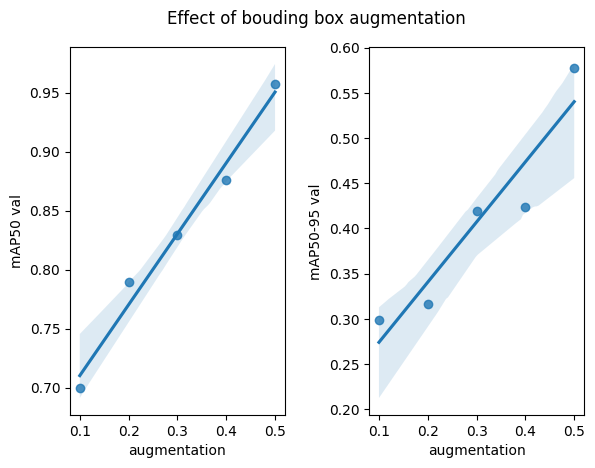

In [58]:
fig, axs = plt.subplots(ncols=2)
fig.tight_layout(pad=3.0)
sns.regplot(x=augmented_normal["augmentation"], y=augmented_normal["mAP50 val"], ax=axs[0])
sns.regplot(x=augmented_normal["augmentation"], y=augmented_normal["mAP50-95 val"], ax=axs[1])
fig.suptitle("Effect of bouding box augmentation")
fig.savefig('./viz_img/augmentation_scatterplot.png')

In [2]:
normal = pd.read_excel('./excel/MAP.xlsx', sheet_name="normal")
normal.head()

,# Images,mAP50 train,mAP50-95 train,mAP50 val,mAP50-95 val
0,100,0.504,0.172,0.504,0.172
1,150,0.741,0.496,0.742,0.496
2,200,0.777,0.534,0.778,0.533
3,250,0.813,0.560,0.813,0.557
4,300,0.746,0.544,0.745,0.543


In [3]:
normal = normal[normal["# Images"] < 400]
normal.head(10)

,# Images,mAP50 train,mAP50-95 train,mAP50 val,mAP50-95 val
0,100,0.504,0.172,0.504,0.172
1,150,0.741,0.496,0.742,0.496
2,200,0.777,0.534,0.778,0.533
3,250,0.813,0.560,0.813,0.557
4,300,0.746,0.544,0.745,0.543
5,350,0.887,0.621,0.887,0.619


In [4]:
normal["weights"] = "normal"
normal.head(10)

,# Images,mAP50 train,mAP50-95 train,mAP50 val,mAP50-95 val,weights
0,100,0.504,0.172,0.504,0.172,normal
1,150,0.741,0.496,0.742,0.496,normal
2,200,0.777,0.534,0.778,0.533,normal
3,250,0.813,0.560,0.813,0.557,normal
4,300,0.746,0.544,0.745,0.543,normal
5,350,0.887,0.621,0.887,0.619,normal


In [5]:
small = pd.read_excel('./excel/MAP.xlsx', sheet_name="small")
small["weights"] = "small"
small.head(10)
small.head(10)

,# images,mAP50 train,mAP50-95 train,mAP50 val,mAP50-95 val,weights
0,100,0.735,0.470,0.734,0.470,small
1,150,0.735,0.470,0.734,0.470,small
2,200,0.787,0.514,0.787,0.514,small
3,250,0.791,0.508,0.791,0.508,small
4,300,0.705,0.503,0.705,0.503,small
5,350,0.859,0.619,0.859,0.617,small


In [22]:
merged = pd.concat([small, normal], join="inner")
merged

,mAP50 train,mAP50-95 train,mAP50 val,mAP50-95 val,weights
0,0.735,0.470,0.734,0.470,small
1,0.735,0.470,0.734,0.470,small
2,0.787,0.514,0.787,0.514,small
3,0.791,0.508,0.791,0.508,small
4,0.705,0.503,0.705,0.503,small
5,0.859,0.619,0.859,0.617,small
0,0.504,0.172,0.504,0.172,normal
1,0.741,0.496,0.742,0.496,normal
2,0.777,0.534,0.778,0.533,normal
3,0.813,0.560,0.813,0.557,normal


In [52]:
merged["weights"] = merged["weights"].replace('normal', "medium")
merged

,mAP50 train,mAP50-95 train,mAP50 val,mAP50-95 val,weights
0,0.735,0.470,0.734,0.470,small
1,0.735,0.470,0.734,0.470,small
2,0.787,0.514,0.787,0.514,small
3,0.791,0.508,0.791,0.508,small
4,0.705,0.503,0.705,0.503,small
5,0.859,0.619,0.859,0.617,small
0,0.504,0.172,0.504,0.172,medium
1,0.741,0.496,0.742,0.496,medium
2,0.777,0.534,0.778,0.533,medium
3,0.813,0.560,0.813,0.557,medium


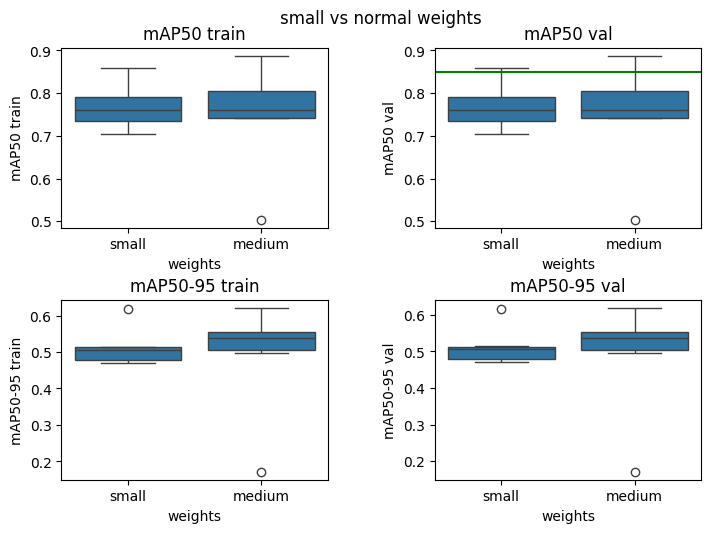

In [53]:
fig, axs = plt.subplots(ncols=2, nrows=2)
fig.tight_layout(pad=3.0)
g1 = sns.boxplot(y = "mAP50 train", x = "weights", data=merged, ax=axs[0,0])
g2 = sns.boxplot(y = "mAP50-95 train", x = "weights", data=merged, ax=axs[1,0])
g3 = sns.boxplot(y = "mAP50 val", x = "weights", data=merged, ax=axs[0,1])
g3.axhline(y=0.85, color="green")
g4 = sns.boxplot(y = "mAP50-95 val", x = "weights", data=merged, ax=axs[1,1])


axs[0,0].title.set_text('mAP50 train')
axs[1,0].title.set_text('mAP50-95 train')
axs[0,1].title.set_text('mAP50 val')
axs[1,1].title.set_text('mAP50-95 val')

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fig.suptitle("small vs normal weights")
fig.savefig('./viz_img/normal_vs_small.png', bbox_inches='tight')

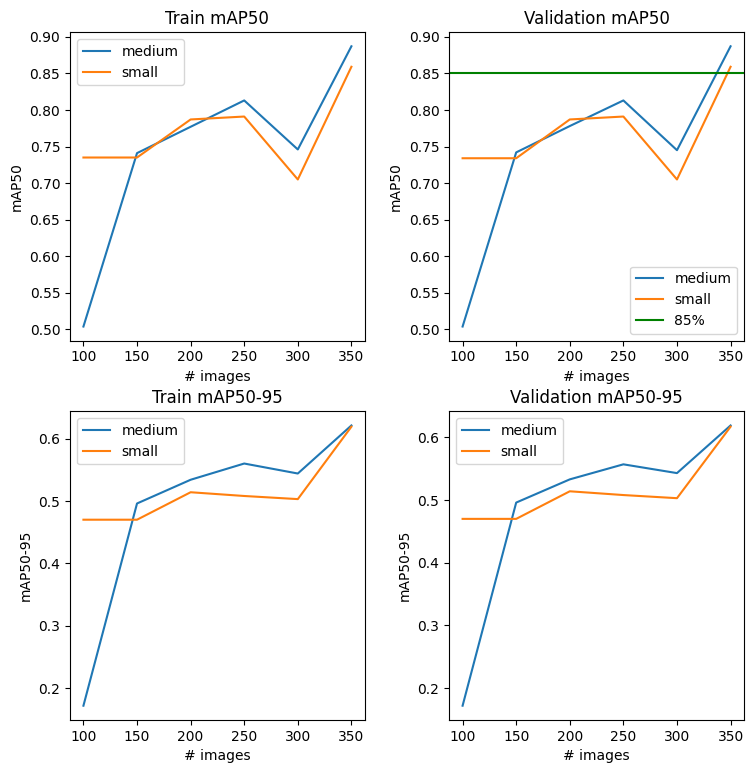

In [57]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8,8))
fig.tight_layout(pad=3.0)
axs[0,0].plot(normal["# Images"], normal["mAP50 train"], label="medium")
axs[0,0].plot(small["# images"], small["mAP50 train"], label="small")
axs[0,0].legend(loc="best")
axs[0,0].set_title("Train mAP50")
axs[0,0].set_xlabel("# images")
axs[0,0].set_ylabel("mAP50")

axs[0,1].plot(normal["# Images"], normal["mAP50 val"], label="medium")
axs[0,1].plot(small["# images"], small["mAP50 val"], label="small")
axs[0,1].axhline(y = 0.85, color = 'green', label="85%")
axs[0,1].legend(loc="best")
axs[0,1].set_title("Validation mAP50")
axs[0,1].set_xlabel("# images")
axs[0,1].set_ylabel("mAP50")

axs[1,0].plot(normal["# Images"], normal["mAP50-95 train"], label="medium")
axs[1,0].plot(small["# images"], small["mAP50-95 train"], label="small")
axs[1,0].legend(loc="best")
axs[1,0].set_title("Train mAP50-95")
axs[1,0].set_xlabel("# images")
axs[1,0].set_ylabel("mAP50-95")

axs[1,1].plot(normal["# Images"], normal["mAP50-95 val"], label="medium")
axs[1,1].plot(small["# images"], small["mAP50-95 val"], label="small")
axs[1,1].legend(loc="best")
axs[1,1].set_title("Validation mAP50-95")
axs[1,1].set_xlabel("# images")
axs[1,1].set_ylabel("mAP50-95")

fig.savefig('./viz_img/normal_vs_small_line.png', bbox_inches='tight')